# Theoretical Modelling Analysis
It might be worth following a single galaxy (or a couple)  in this script as a way of looking at particular changes. Ideally picking an extreme galaxy that could potentially be affected in both the UVJ, ugr, and the IRAC? worth having a look 



 $\textbf{!!! Currently this is just been copied from another script , it will need to be adjusted for a single galaxy look + SED investigation}$!!!

In [507]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath


# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [508]:
# Choose if you want to save the plots
save_figures = True
fig_size_params = (10, 6)

In [509]:
# We would like to investigate the effects of the different filters.
# Read in the dataframe

template_set_name = 'Brown'
agn_model_name = 'Type1AGN'

composite_choice = f'{template_set_name}_theoretical_composite_fluxes_{agn_model_name}'

# read in the dataframe and ensure that the unamed: 0 column is the index
composite_choice = f'{template_set_name}_theoretical_composite_fluxes_{agn_model_name}'
composite_fluxes = pd.read_csv(f'outputs\composite_seds\{composite_choice}.csv', index_col=0)   
# Drop the first col
#composite_fluxes = composite_fluxes.drop(columns=['Unnamed: 0.1'])

composite_fluxes.reset_index(drop=True, inplace=True)

In [510]:
# Check outputs
composite_fluxes

,id,z,U_0,U_10,U_20,U_30,U_40,U_50,U_60,U_70,...,r_10,r_20,r_30,r_40,r_50,r_60,r_70,r_80,r_90,r_100
0,Arp_118,0.0,-21.198908,-21.315776,-21.421279,-21.517432,-21.605757,-21.687435,-21.763396,-21.834388,...,-23.454779,-23.475153,-23.495151,-23.514788,-23.534076,-23.553028,-23.571654,-23.589966,-23.607974,-23.625689
1,Arp_256_N,0.0,-20.237172,-20.287567,-20.335726,-20.381839,-20.426074,-20.468576,-20.509478,-20.548894,...,-21.492481,-21.513877,-21.534859,-21.555444,-21.575645,-21.595478,-21.614955,-21.634088,-21.652890,-21.671372
2,Arp_256_S,0.0,-20.201401,-20.302567,-20.395105,-20.480372,-20.559427,-20.633115,-20.702117,-20.766996,...,-21.460665,-21.504041,-21.545751,-21.585917,-21.624651,-21.662050,-21.698203,-21.733192,-21.767088,-21.799958
3,CGCG_049-057,0.0,-17.401194,-17.657027,-17.863926,-18.037638,-18.187352,-18.318902,-18.436221,-18.542091,...,-19.901468,-19.939198,-19.975661,-20.010938,-20.045106,-20.078231,-20.110376,-20.141596,-20.171943,-20.201465
4,CGCG_436-030,0.0,-20.094718,-20.244207,-20.375583,-20.492764,-20.598521,-20.694885,-20.783389,-20.865219,...,-21.546386,-21.601016,-21.653028,-21.702663,-21.750127,-21.795603,-21.839250,-21.881211,-21.921609,-21.960559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,UGC_09618_N,3.9,37.371478,28.856104,28.103742,27.663585,27.351274,27.109020,26.911081,26.743724,...,27.953385,27.384060,27.012499,26.736186,26.516120,26.333229,26.176750,26.040009,25.918579,25.809374
5116,UGC_09618,3.9,36.333443,28.487211,27.735031,27.294934,26.982653,26.740418,26.542491,26.375143,...,27.182581,26.759907,26.456444,26.219535,26.025174,25.860380,25.717334,25.590959,25.477772,25.375279
5117,UGC_09618_S,3.9,34.982780,29.716301,28.967982,28.529176,28.217541,27.975693,27.778025,27.610862,...,27.645340,27.417662,27.229551,27.069268,26.929633,26.805926,26.694884,26.594152,26.501977,26.417019
5118,UGC_12150,3.9,38.434321,29.718392,28.965994,28.525825,28.213508,27.971250,27.773309,27.605950,...,29.110326,28.410883,27.988959,27.685882,27.449206,27.255002,27.090322,26.947361,26.821052,26.707918


In [511]:
# Reduce the size of the dataframe to only one composite set (include all redshifts)
# # To ensure reproduceability, we will choose a random seed
# np.random.seed(42)

# # Get all the ids
# ids = composite_fluxes['id'].unique()

# # Randomly choose an id
# id = np.random.choice(ids)
# print(f"Choosing id: {id}")	

# # Get the composite set
# composite_fluxes = composite_fluxes[composite_fluxes['id'] == id]

# # Turn off all other redshifts 
# restframed = True
# if restframed:
#     print("Only including the restframe colours")
#     composite_fluxes = composite_fluxes[composite_fluxes['z'] == 0.0]


In [512]:
# Check
composite_fluxes

,id,z,U_0,U_10,U_20,U_30,U_40,U_50,U_60,U_70,...,r_10,r_20,r_30,r_40,r_50,r_60,r_70,r_80,r_90,r_100
0,Arp_118,0.0,-21.198908,-21.315776,-21.421279,-21.517432,-21.605757,-21.687435,-21.763396,-21.834388,...,-23.454779,-23.475153,-23.495151,-23.514788,-23.534076,-23.553028,-23.571654,-23.589966,-23.607974,-23.625689
1,Arp_256_N,0.0,-20.237172,-20.287567,-20.335726,-20.381839,-20.426074,-20.468576,-20.509478,-20.548894,...,-21.492481,-21.513877,-21.534859,-21.555444,-21.575645,-21.595478,-21.614955,-21.634088,-21.652890,-21.671372
2,Arp_256_S,0.0,-20.201401,-20.302567,-20.395105,-20.480372,-20.559427,-20.633115,-20.702117,-20.766996,...,-21.460665,-21.504041,-21.545751,-21.585917,-21.624651,-21.662050,-21.698203,-21.733192,-21.767088,-21.799958
3,CGCG_049-057,0.0,-17.401194,-17.657027,-17.863926,-18.037638,-18.187352,-18.318902,-18.436221,-18.542091,...,-19.901468,-19.939198,-19.975661,-20.010938,-20.045106,-20.078231,-20.110376,-20.141596,-20.171943,-20.201465
4,CGCG_436-030,0.0,-20.094718,-20.244207,-20.375583,-20.492764,-20.598521,-20.694885,-20.783389,-20.865219,...,-21.546386,-21.601016,-21.653028,-21.702663,-21.750127,-21.795603,-21.839250,-21.881211,-21.921609,-21.960559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,UGC_09618_N,3.9,37.371478,28.856104,28.103742,27.663585,27.351274,27.109020,26.911081,26.743724,...,27.953385,27.384060,27.012499,26.736186,26.516120,26.333229,26.176750,26.040009,25.918579,25.809374
5116,UGC_09618,3.9,36.333443,28.487211,27.735031,27.294934,26.982653,26.740418,26.542491,26.375143,...,27.182581,26.759907,26.456444,26.219535,26.025174,25.860380,25.717334,25.590959,25.477772,25.375279
5117,UGC_09618_S,3.9,34.982780,29.716301,28.967982,28.529176,28.217541,27.975693,27.778025,27.610862,...,27.645340,27.417662,27.229551,27.069268,26.929633,26.805926,26.694884,26.594152,26.501977,26.417019
5118,UGC_12150,3.9,38.434321,29.718392,28.965994,28.525825,28.213508,27.971250,27.773309,27.605950,...,29.110326,28.410883,27.988959,27.685882,27.449206,27.255002,27.090322,26.947361,26.821052,26.707918


In [513]:
# Check which IRAC filters are available (whatever begins with IRAC)
irac_filters = [col for col in composite_fluxes.columns if col.startswith('IRAC')]
print(irac_filters)


['IRAC3.6_0', 'IRAC3.6_10', 'IRAC3.6_20', 'IRAC3.6_30', 'IRAC3.6_40', 'IRAC3.6_50', 'IRAC3.6_60', 'IRAC3.6_70', 'IRAC3.6_80', 'IRAC3.6_90', 'IRAC3.6_100', 'IRAC4.5_0', 'IRAC4.5_10', 'IRAC4.5_20', 'IRAC4.5_30', 'IRAC4.5_40', 'IRAC4.5_50', 'IRAC4.5_60', 'IRAC4.5_70', 'IRAC4.5_80', 'IRAC4.5_90', 'IRAC4.5_100', 'IRAC5.8_0', 'IRAC5.8_10', 'IRAC5.8_20', 'IRAC5.8_30', 'IRAC5.8_40', 'IRAC5.8_50', 'IRAC5.8_60', 'IRAC5.8_70', 'IRAC5.8_80', 'IRAC5.8_90', 'IRAC5.8_100', 'IRAC8.0_0', 'IRAC8.0_10', 'IRAC8.0_20', 'IRAC8.0_30', 'IRAC8.0_40', 'IRAC8.0_50', 'IRAC8.0_60', 'IRAC8.0_70', 'IRAC8.0_80', 'IRAC8.0_90', 'IRAC8.0_100']


In [514]:
# Check for each entry of a particular filter, how many variations of it there are i.e U_0, U_10
# Allow us to have a robust way of investigating the effects of the different alpha values automatically, without recoding the filter names/alpha values

# Get the filters
filters = composite_fluxes.columns[2:]

# For the first filter, see how many variations there are
filter_choice = filters[0].split('_')[0]


# Get the variations
filter_variations = [filter for filter in filters if filter_choice in filter]

# add the alpha values to a new array
alpha_values = [int(filter.split('_')[1]) for filter in filter_variations]

# Print the alpha values
print(alpha_values)


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


## UVJ
### Plot
The code below will generate a subplot for the UVJ diagrams of the theoretical models. For this single galaxy (ish) analysis instead of doing a single galaxy analysis for the UVJ we will instead look at the starting position UV-VJ of a galaxy in each zone (i.e the Quiescient, Star Forming and the Dusty Zone) and we will see their path with both the Type 1 and Type 2 AGN composites and also look at their resultant SED. (This selection of three galaxies can potentially be also explored in the ugr and IRAC diagrams) - check in after this

In [515]:
# We need to choose our three seperate galaxies
spacing = len(alpha_values)
colours_theme = plt.cm.viridis(np.linspace(0, 1, spacing))


fig, axs = plt.subplots(1, 1, figsize=(6, 6))
for m in range(len(alpha_values)):
    # Get the filter magnitudes
    U_mag = composite_fluxes[f'U_{alpha_values[m]}']
    V_mag = composite_fluxes[f'V_{alpha_values[m]}']
    J_mag = composite_fluxes[f'J_{alpha_values[m]}']
    
    # Create the colours
    uv = U_mag - V_mag
    vj = V_mag - J_mag
    
    # Recall that this is only a restframe diagram, so only look at the restframe colours
    uv = uv[composite_fluxes['z'] == 0]
    vj = vj[composite_fluxes['z'] == 0]
    
    # Plot scatter
    axs.scatter(vj, uv, c=[colours_theme[m]], s=10)

axs.set_xlim(-0.5, 2.2)
axs.set_ylim(0, 2.5)

# define the UV and VJ colours for the inital agn_contribution of 0
U_mag = composite_fluxes[f'U_{0}']
V_mag = composite_fluxes[f'V_{0}']
J_mag = composite_fluxes[f'J_{0}']

# Create the colours
uv = U_mag - V_mag
vj = V_mag - J_mag

# Restframe
uv = uv[composite_fluxes['z'] == 0]
vj = vj[composite_fluxes['z'] == 0]

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
axs.add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
axs.add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
axs.add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))


# Use the above to define selections,for SF, Quiescent and SFD galaxies

# Path for SF galaxies
sf_path = mpath.Path(path_sf)
quiescent_path = mpath.Path(path_quiescent)
dusty_path = mpath.Path(path_sfd)

# Select galaxies
# 1. SF galaxies
sf_galaxies = sf_path.contains_points(np.column_stack((vj, uv)))

#2. Quiescent galaxies
quiescent_galaxies = quiescent_path.contains_points(np.column_stack((vj, uv)))

# Select galaxies
dusty_galaxies = dusty_path.contains_points(np.column_stack((vj, uv)))

# Add vertical line
axs.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

# Add axis labels
axs.set_xlabel("V - J")

# AGN Colour Evolution title
axs.set_title("Colour Evolution")



# Plot colorbar for AGN contribution
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(alpha_values), vmax=max(alpha_values)))
cbar = plt.colorbar(sm, ax=axs)

# Name the colorbar
cbar.set_label('AGN Contribution')

In [516]:
# Plot the scatter plot for each galaxy region
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.scatter(vj[sf_galaxies], uv[sf_galaxies], c='blue', s=10, label='SF')
axs.scatter(vj[quiescent_galaxies], uv[quiescent_galaxies], c='red', s=10, label='Quiescent')
axs.scatter(vj[dusty_galaxies], uv[dusty_galaxies], c='green', s=10, label='SFD')

# Add limits
axs.set_xlim(-0.5, 2.2)
axs.set_ylim(0, 2.5)

# Add axis labels
axs.set_xlabel("V - J")
axs.set_ylabel("U - V")

# Add patches
axs.add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
axs.add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
axs.add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add line
axs.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)


In [517]:
# Now that we have a selection of inital UVJ colours we can select exactly the galaxy
# Two ways we can implement this, either choose the point closest to the average position in the region
# or choose an entirely random point


# Choose the average position
# SF
sf_galaxies = np.where(sf_galaxies)[0]

# Calc average position (vj, uv)
sf_uv = np.mean(uv[sf_galaxies])
sf_vj = np.mean(vj[sf_galaxies])

# Look for a galaxy that is the closest to the average position
sf_galaxy = np.argmin((vj[sf_galaxies] - sf_vj)**2 + (uv[sf_galaxies] - sf_uv)**2)
sf_galaxy = sf_galaxies[sf_galaxy]


# # Quiescent
quiescent_galaxies = np.where(quiescent_galaxies)[0]

# Calc average position (vj, uv)
quiescent_uv = np.mean(uv[quiescent_galaxies])
quiescent_vj = np.mean(vj[quiescent_galaxies])

# Look for a galaxy that is the closest to the average position
quiescent_galaxy = np.argmin((vj[quiescent_galaxies] - quiescent_vj)**2 + (uv[quiescent_galaxies] - quiescent_uv)**2)
quiescent_galaxy = quiescent_galaxies[quiescent_galaxy]


# # Dusty
dusty_galaxies = np.where(dusty_galaxies)[0]

# Calc average position (vj, uv)
dusty_uv = np.mean(uv[dusty_galaxies])
dusty_vj = np.mean(vj[dusty_galaxies])

# Look for a galaxy that is the closest to the average position
dusty_galaxy = np.argmin((vj[dusty_galaxies] - dusty_vj)**2 + (uv[dusty_galaxies] - dusty_uv)**2)
dusty_galaxy = dusty_galaxies[dusty_galaxy]

# Print the galaxy ids
print(f"SF galaxy: {sf_galaxy}, id: {composite_fluxes['id'].iloc[sf_galaxy]}")
print(f"Quiescent galaxy: {quiescent_galaxy}, id: {composite_fluxes['id'].iloc[quiescent_galaxy]}")
print(f"Dusty galaxy: {dusty_galaxy}, id: {composite_fluxes['id'].iloc[dusty_galaxy]}")




SF galaxy: 1, id: Arp_256_N
Quiescent galaxy: 56, id: NGC_4138
Dusty galaxy: 102, id: NGC_6240


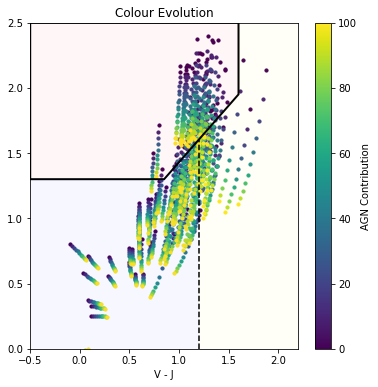

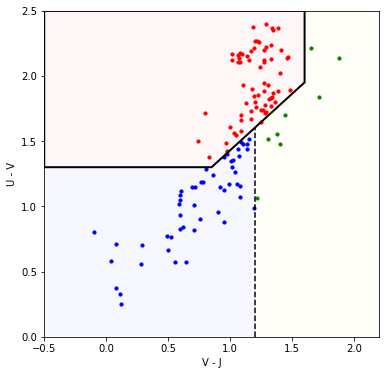

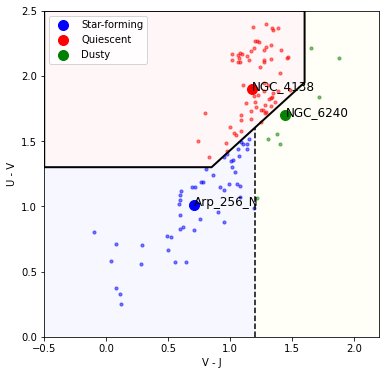

In [518]:
# Plot the UVJ diagram of the galaxies
fig, axs = plt.subplots(1, 1, figsize=(6, 6))

# Plot the scatter plot for each galaxy region
axs.scatter(vj[sf_galaxies], uv[sf_galaxies], c='blue', s=10, alpha=0.5)
axs.scatter(vj[quiescent_galaxies], uv[quiescent_galaxies], c='red', s=10, alpha=0.5)
axs.scatter(vj[dusty_galaxies], uv[dusty_galaxies], c='green', s=10, alpha=0.5)

# Add limits
axs.set_xlim(-0.5, 2.2)
axs.set_ylim(0, 2.5)

# Add axis labels
axs.set_xlabel("V - J")
axs.set_ylabel("U - V")

# Add patches
axs.add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
axs.add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
axs.add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add line
axs.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

# Add the galaxy points
axs.scatter(vj[sf_galaxy], uv[sf_galaxy], c='blue', s=100, label='Star-forming')
axs.scatter(vj[quiescent_galaxy], uv[quiescent_galaxy], c='red', s=100, label='Quiescent')
axs.scatter(vj[dusty_galaxy], uv[dusty_galaxy], c='green', s=100, label='Dusty')

# Add the galaxy ids
axs.text(vj[sf_galaxy], uv[sf_galaxy], f"{composite_fluxes['id'].iloc[sf_galaxy]}", fontsize=12, ha='left')
axs.text(vj[quiescent_galaxy], uv[quiescent_galaxy], f"{composite_fluxes['id'].iloc[quiescent_galaxy]}", fontsize=12, ha='left')
axs.text(vj[dusty_galaxy], uv[dusty_galaxy], f"{composite_fluxes['id'].iloc[dusty_galaxy]}", fontsize=12, ha='left')

# Add legend
axs.legend()

# Save
if save_figures:
    plt.savefig(f'outputs/ThesisPlots/{composite_choice}_uvj_diagram.png', dpi=300)

# Show
plt.show()



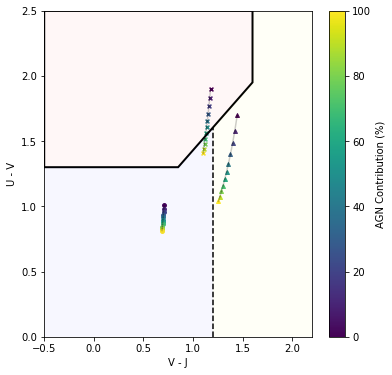

In [519]:
# We now want to watch the evolution of each of the chosen galaxies, as the AGN contribution increases (potentially have a heatmap on the back or a contour plot showing the density of the high alpha contributions)

# Setup limits


# Plot the UVJ diagram of the galaxies
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
for m in range(len(alpha_values)):   
    # Ensure we are only looking at the id's of the chosen galaxy
    sf_galaxy_id = composite_fluxes['id'].iloc[sf_galaxy]
    quiescent_galaxy_id = composite_fluxes['id'].iloc[quiescent_galaxy]
    dusty_galaxy_id = composite_fluxes['id'].iloc[dusty_galaxy]
    

    # Subset the composite to only include the galaxies by id, and their associated colours
    composite_subset = composite_fluxes[(composite_fluxes['id'] == sf_galaxy_id) | (composite_fluxes['id'] == quiescent_galaxy_id) | (composite_fluxes['id'] == dusty_galaxy_id)]
    
    # only use restframe fluxes
    composite_subset = composite_subset[composite_subset['z'] == 0]
    
    # Reset index
    composite_subset.reset_index(drop=True, inplace=True)
    

    # Get the filter magnitudes
    U_mag = composite_subset[f'U_{alpha_values[m]}'] 
    V_mag = composite_subset[f'V_{alpha_values[m]}']
    J_mag = composite_subset[f'J_{alpha_values[m]}']
    
    # Create the colours
    uv = U_mag - V_mag
    vj = V_mag - J_mag
    
    
    
    # Plot a faint line from on alpha value to the next
    if m < (len(alpha_values) - 1):
        # Get the next value to plot a line to
        U_mag_next = composite_subset[f'U_{alpha_values[m+1]}'] 
        V_mag_next = composite_subset[f'V_{alpha_values[m+1]}']
        J_mag_next = composite_subset[f'J_{alpha_values[m+1]}']
        
        # Create the colours
        uv_next = U_mag_next - V_mag_next
        vj_next = V_mag_next - J_mag_next
    
        # Plot line
        axs.plot([vj, vj_next], [uv, uv_next], 'k-', alpha=0.2)
        
    # Plot scatter - use different symbol for each plotted galaxy, but still use the colour scheme
    axs.scatter(vj[0], uv[0], c=[colours_theme[m]], s=15, marker='o') # SF
    axs.scatter(vj[1], uv[1], c=[colours_theme[m]], s=15, marker='x') # Quiescent
    axs.scatter(vj[2], uv[2], c=[colours_theme[m]], s=15, marker='^') # Dusty
    
# axs.set_xlim(-0.5, 2.2)
# axs.set_ylim(0, 2.5)

# # define the UV and VJ colours for the inital agn_contribution of 0
# U_mag = composite_fluxes[f'U_{0}']
# V_mag = composite_fluxes[f'V_{0}']
# J_mag = composite_fluxes[f'J_{0}']

# # Create the colours
# uv = U_mag - V_mag
# vj = V_mag - J_mag

# # Restframe
# uv = uv[composite_fluxes['z'] == 0]
# vj = vj[composite_fluxes['z'] == 0]

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
axs.add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
axs.add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
axs.add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add the line
axs.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

# Add limits
axs.set_xlim(-0.5, 2.2)
axs.set_ylim(0, 2.5)

# Add labels
axs.set_xlabel('V - J')
axs.set_ylabel('U - V')

# Add colourbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(alpha_values), vmax=max(alpha_values)))
cbar = plt.colorbar(sm, ax=axs)

# Add cbar title
cbar.set_label('AGN Contribution (%)')


# Save
if save_figures:
    plt.savefig(f'outputs/ThesisPlots/{composite_choice}_uvj_diagram_alpha_evolution.png', dpi=300)

plt.show()




In [520]:
# Lastly we have the chance to explor the SED related to this and how it changes, 
# We can do a 3, 1 plot for each of the chosen galaxies and show the sed evolution as the AGN contribution increases
# 

# Read in the associated SEDs
sed_path = f'outputs/composite_seds/{template_set_name}/'

seds = [[],[],[]]

for i, galaxy_id in enumerate([sf_galaxy_id, quiescent_galaxy_id, dusty_galaxy_id]):
    print(galaxy_id)
    
    # Read in the SED
    for m in alpha_values:
        sed_choice_path = sed_path + f'{galaxy_id}{agn_model_name}composite_{m}.csv'
        # Read in the SED
        
        sed = pd.read_csv(sed_choice_path, skiprows=1, names=['Wavelength', f'Flux_{m}'])
        
        # Append to the list
        seds[i].append(sed)


    
seds

# Combine all the SEDS in each column (merge on wavelength)
sf_sed = seds[0][0]
quiescent_sed = seds[1][0]
dusty_sed = seds[2][0]

for m in range(1, len(alpha_values)):
    sf_sed = pd.merge(sf_sed, seds[0][m], on='Wavelength')
    quiescent_sed = pd.merge(quiescent_sed, seds[1][m], on='Wavelength')
    dusty_sed = pd.merge(dusty_sed, seds[2][m], on='Wavelength')




# # print
# print(sf_sed)

# # Plot the SEDs
# fig, axs = plt.subplots(1, 1, figsize=(10, 6))
# for m in range(len(alpha_values)):
#     # Plot the SED
#     axs.loglog(sf_sed['Wavelength'], sf_sed[f'Flux_{alpha_values[m]}'], label=f'AGN Contribution: {alpha_values[m]}%')
    
# # Add labels
# axs.set_xlabel('Wavelength ($\AA$)')
# axs.set_ylabel('Flux ($10^{-17}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')
# axs.set_title('Star-forming Galaxy SED Evolution')
# axs.legend()
# plt.show()

# # Plot the SEDs
# fig, axs = plt.subplots(1, 1, figsize=(10, 6))
# for m in range(len(alpha_values)):
#     # Plot the SED
#     axs.loglog(quiescent_sed['Wavelength'], quiescent_sed[f'Flux_{alpha_values[m]}'], label=f'AGN Contribution: {alpha_values[m]}%')

# # Add labels
# axs.set_xlabel('Wavelength ($\AA$)')
# axs.set_ylabel('Flux ($10^{-17}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')
# axs.set_title('Quiescent Galaxy SED Evolution')
# axs.legend()
# plt.show()

# # Plot the SEDs
# fig, axs = plt.subplots(1, 1, figsize=(10, 6))
# for m in range(len(alpha_values)):
#     # Plot the SED
#     axs.loglog(dusty_sed['Wavelength'], dusty_sed[f'Flux_{alpha_values[m]}'], label=f'AGN Contribution: {alpha_values[m]}%')
    
# # Add labels
# axs.set_xlabel('Wavelength ($\AA$)')
# axs.set_ylabel('Flux ($10^{-17}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')
# axs.set_title('Dusty Galaxy SED Evolution')
# axs.legend()
# plt.show()


Arp_256_N
NGC_4138
NGC_6240


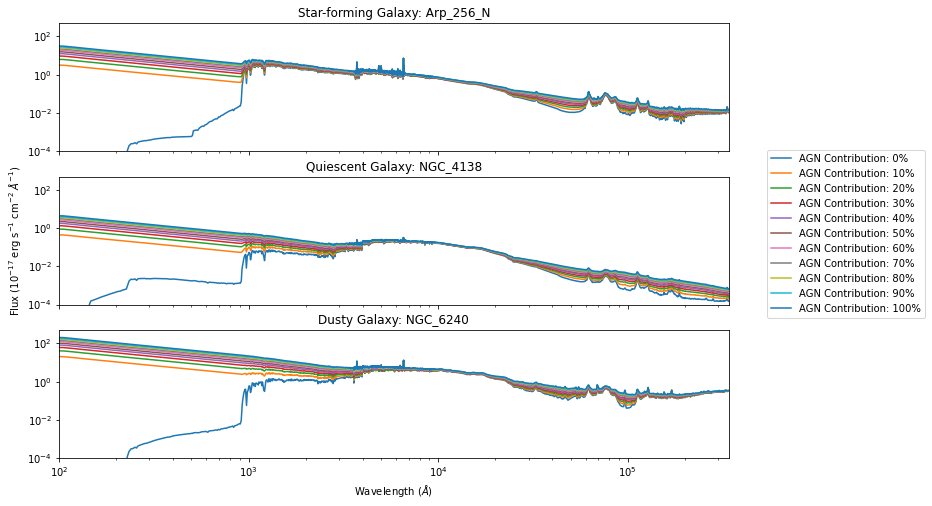

In [521]:
# Do the same, but put it into a 3,1 plot
fig, axs = plt.subplots(3, 1, figsize=(12 , 8), sharex=True, sharey=True)
for m in range(len(alpha_values)):
    # Plot the SED
    axs[0].loglog(sf_sed['Wavelength'], sf_sed[f'Flux_{alpha_values[m]}'], label=f'AGN Contribution: {alpha_values[m]}%')
    axs[1].loglog(quiescent_sed['Wavelength'], quiescent_sed[f'Flux_{alpha_values[m]}'], label=f'AGN Contribution: {alpha_values[m]}%')
    axs[2].loglog(dusty_sed['Wavelength'], dusty_sed[f'Flux_{alpha_values[m]}'], label=f'AGN Contribution: {alpha_values[m]}%')
    
# Add labels


axs[0].set_title(f'Star-forming Galaxy: {sf_galaxy_id}')
axs[1].set_ylabel('Flux ($10^{-17}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')
axs[1].set_title(f'Quiescent Galaxy: {quiescent_galaxy_id}')
# Make the legend go outside
axs[1].legend(bbox_to_anchor=(1.05, 1.25), loc='upper left')
axs[2].set_xlabel('Wavelength ($\AA$)')
axs[2].set_title(f'Dusty Galaxy: {dusty_galaxy_id}')

# Clip all axis between some limits
for ax in axs:
    ax.set_xlim(1e2, 340000)
    ax.set_ylim(1e-4, 500)



if save_figures:
    plt.savefig(f'outputs/ThesisPlots/SED_evolution_UVJ_{template_set_name}_{agn_model_name}.png', dpi=300)

plt.show()




## ugr
### Plot

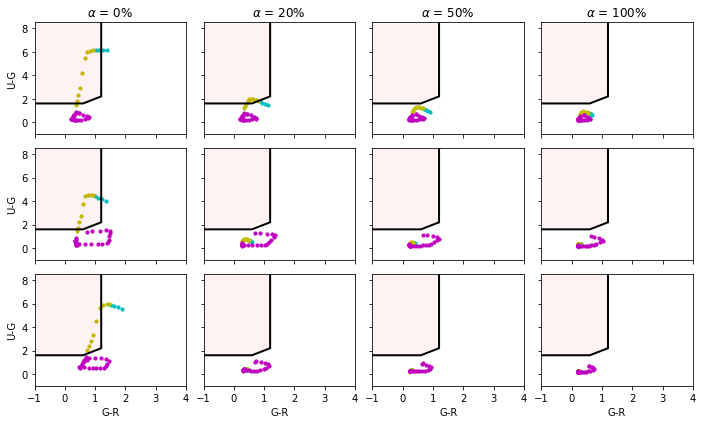

In [522]:
# Similar to above we use the subset ids to explore the effect on the ugr colour space. Instead we see how these galaxies change with redshift increases
# Redshift increase for the particular subset of galaxies
# Ensure we are only looking at the id's of the chosen galaxy

fig, axs = plt.subplots(3, 4, figsize=fig_size_params, sharex=True, sharey=True)
alpha_values = [0, 20, 50, 100]

for n in range(len(alpha_values)):
    
    # Subset the composite to only include the galaxies by id, and their associated colours
    composite_subset_sf = composite_fluxes[(composite_fluxes['id'] == sf_galaxy_id)].copy()

    # Subset the composite to only include the galaxies by id, and their associated colours
    composite_subset_q = composite_fluxes[(composite_fluxes['id'] == quiescent_galaxy_id)].copy()

    # Subset the composite to only include the galaxies by id, and their associated colours
    composite_subset_d = composite_fluxes[(composite_fluxes['id'] == dusty_galaxy_id)].copy()
    
    
    ###########################################################################################################
    # Star-forming    
    
    
    # Get the u, g, and r magnitudes for the specific alpha value
    u_col_name = f'u_{int(round(alpha_values[n], 2))}'
    g_col_name = f'g_{int(round(alpha_values[n], 2))}'
    r_col_name = f'r_{int(round(alpha_values[n], 2))}'

    # Create the colours for the UGR diagram
    ug_specific_alpha_colours = composite_subset_sf[u_col_name] - composite_subset_sf[g_col_name]
    gr_specific_alpha_colours = composite_subset_sf[g_col_name] - composite_subset_sf[r_col_name]

    # Only do the star-forming galaxies
    
    #sf_galaxy_id = composite_subset_sf['id'].iloc[sf_galaxy]

    
    # Scatter plots with color-coded redshift ranges only using the star-forming galaxy
    axs[0, n % 4].scatter(gr_specific_alpha_colours[composite_subset_sf['z'] > 3.5],
                                ug_specific_alpha_colours[composite_subset_sf['z'] > 3.5],
                                c="c", s=10, label="z > 3.5")
    
    axs[0, n % 4].scatter(gr_specific_alpha_colours[(composite_subset_sf['z'] > 2.6) & (composite_subset_sf['z'] <= 3.5)],
                                    ug_specific_alpha_colours[(composite_subset_sf['z'] > 2.6) & (composite_subset_sf['z'] <= 3.5)],
                                    c="y", s=10, label="2.6 < z < 3.5")
    
    axs[0, n % 4].scatter(gr_specific_alpha_colours[composite_subset_sf['z'] < 2.6],
                                    ug_specific_alpha_colours[composite_subset_sf['z'] < 2.6],
                                    c="m", s=10, label="z < 2.6")
    
    
    ###########################################################################################################
    # Quiescent    
    
    # Get the u, g, and r magnitudes for the specific alpha value
    u_col_name = f'u_{int(round(alpha_values[n], 2))}'
    g_col_name = f'g_{int(round(alpha_values[n], 2))}'
    r_col_name = f'r_{int(round(alpha_values[n], 2))}'
    
    # Create the colours for the UGR diagram
    ug_specific_alpha_colours = composite_subset_q[u_col_name] - composite_subset_q[g_col_name]
    gr_specific_alpha_colours = composite_subset_q[g_col_name] - composite_subset_q[r_col_name]

    #print(composite_subset_q)

    # Only do the quiescent
    quiescent_galaxy_id = composite_subset_q['id'].iloc[0]
    
    
    # Scatter plots with color-coded redshift ranges only using the star-forming galaxy
    axs[1, n % 4].scatter(gr_specific_alpha_colours[composite_subset_q['z'] > 3.5],
                                ug_specific_alpha_colours[composite_subset_q['z'] > 3.5],
                                c="c", s=10, label="z > 3.5")
    
    axs[1, n % 4].scatter(gr_specific_alpha_colours[(composite_subset_q['z'] > 2.6) & (composite_subset_q['z'] <= 3.5)],
                                    ug_specific_alpha_colours[(composite_subset_q['z'] > 2.6) & (composite_subset_q['z'] <= 3.5)],
                                    c="y", s=10, label="2.6 < z < 3.5")
    
    axs[1, n % 4].scatter(gr_specific_alpha_colours[composite_subset_q['z'] < 2.6],
                                    ug_specific_alpha_colours[composite_subset_q['z'] < 2.6],
                                    c="m", s=10, label="z < 2.6")
    

    

    ##########################################################################################################
    # Dusty    
    
    # Get the u, g, and r magnitudes for the specific alpha value
    u_col_name = f'u_{int(round(alpha_values[n], 2))}'
    g_col_name = f'g_{int(round(alpha_values[n], 2))}'
    r_col_name = f'r_{int(round(alpha_values[n], 2))}'
    
    # Create the colours for the UGR diagram
    ug_specific_alpha_colours = composite_subset_d[u_col_name] - composite_subset_d[g_col_name]
    gr_specific_alpha_colours = composite_subset_d[g_col_name] - composite_subset_d[r_col_name]

    # Only do the star-forming galaxies
    #dusty_galaxy_id = composite_subset_d['id'].iloc[dusty_galaxy]

    
    # Scatter plots with color-coded redshift ranges only using the star-forming galaxy
    axs[2, n % 4].scatter(gr_specific_alpha_colours[composite_subset_d['z'] > 3.5],
                                ug_specific_alpha_colours[composite_subset_d['z'] > 3.5],
                                c="c", s=10, label="z > 3.5")
    
    axs[2, n % 4].scatter(gr_specific_alpha_colours[(composite_subset_d['z'] > 2.6) & (composite_subset_d['z'] <= 3.5)],
                                    ug_specific_alpha_colours[(composite_subset_d['z'] > 2.6) & (composite_subset_d['z'] <= 3.5)],
                                    c="y", s=10, label="2.6 < z < 3.5")
    
    axs[2, n % 4].scatter(gr_specific_alpha_colours[composite_subset_d['z'] < 2.6],
                                    ug_specific_alpha_colours[composite_subset_d['z'] < 2.6],
                                    c="m", s=10, label="z < 2.6")

    
    # Set the AGN Contribution title 
    axs[n//4, n%4].set_title(rf'$\alpha$ = {alpha_values[n]}%')
    
    plt.xlabel("")
    plt.ylabel("")
    #plt.title("UGR Diagram for SED Templates at Different Redshifts(0 < z < 4) for alpha = {}".format(alphas[n]))

      

    
    # add the alpha value information onto the plot somewhere
    #axs[n//4, n%4].text(0.5, 0.9, f"alpha = {round(alpha[n], 2)}", horizontalalignment='center', verticalalignment='center', transform=axs[n//4, n%4].transAxes)

    # Additionally we can plot the UGR selection criteria on the UGR diagram
    U_rule = [[1.2,9], [1.2,2.2], [0.6,1.6], [-3,1.6], [-3,9]]
    axs[0, n%4].add_patch(plt.Polygon(U_rule, closed=True, fill=True, facecolor=(1,0,0,0.05), edgecolor=(0,0,0,1), linewidth=2, linestyle='solid')) # This looks like the correct U dropout technique
    axs[1, n%4].add_patch(plt.Polygon(U_rule, closed=True, fill=True, facecolor=(1,0,0,0.05), edgecolor=(0,0,0,1), linewidth=2, linestyle='solid')) # This looks like the correct U dropout technique
    axs[2, n%4].add_patch(plt.Polygon(U_rule, closed=True, fill=True, facecolor=(1,0,0,0.05), edgecolor=(0,0,0,1), linewidth=2, linestyle='solid')) # This looks like the correct U dropout technique
    # append the associated redshifts to the ugr data
    redshifts = composite_fluxes['z']
    
    

    
    axs[n//4, n%4].set_xlim(-1, 4)
    axs[n//4, n%4].set_ylim(-1, 8.5)
    
# # Make all the plots touch
    # Set the axis labels
    
# U-G
axs[0, 0].set_ylabel("U-G") 
axs[1, 0].set_ylabel("U-G") 
axs[2, 0].set_ylabel("U-G") 

# G-R
axs[2, 0].set_xlabel("G-R") 
axs[2, 1].set_xlabel("G-R") 
axs[2, 2].set_xlabel("G-R") 
axs[2, 3].set_xlabel("G-R") 


# Make the subplots closer together
#plt.subplots_adjust(wspace=0.05, hspace=0.3)
    
plt.tight_layout()
if save_figures:
    plt.savefig(f'outputs/ThesisPlots/SED_evolution_ugr_{template_set_name}_{agn_model_name}.png', dpi=300)

# Plot
plt.show()

In [523]:
# Idea, maybe the redshift paths of each of the selected galaxies can be shown in a 3x4 subplot, 

In [524]:
# import matplotlib.pyplot as plt
# from matplotlib.colors import Normalize
# from matplotlib.cm import get_cmap

# # Define a colormap for redshift and normalize it to the range of your redshift data
# cmap = get_cmap('viridis')
# norm = Normalize(vmin=composite_fluxes['z'].min(), vmax=composite_fluxes['z'].max())

# for n in range(len(alpha_values)):
#     sf_galaxy_id = composite_fluxes['id'].iloc[sf_galaxy]
#     quiescent_galaxy_id = composite_fluxes['id'].iloc[quiescent_galaxy]
#     dusty_galaxy_id = composite_fluxes['id'].iloc[dusty_galaxy]

#     composite_subset = composite_fluxes[
#         (composite_fluxes['id'] == sf_galaxy_id) |
#         (composite_fluxes['id'] == quiescent_galaxy_id) |
#         (composite_fluxes['id'] == dusty_galaxy_id)
#     ]

    

#     # Scatter plots with shape and color-coded redshift
#     for galaxy_id, marker in zip([sf_galaxy_id, quiescent_galaxy_id, dusty_galaxy_id], ['*', 'o', '^']):
#         print(galaxy_id)
#         print(marker)
        
        
        
#         galaxy_data = composite_subset[composite_subset['id'] == galaxy_id]
        
#         u_col_name = f'u_{int(round(alpha_values[n], 2))}'
#         g_col_name = f'g_{int(round(alpha_values[n], 2))}'
#         r_col_name = f'r_{int(round(alpha_values[n], 2))}'


#         ug_specific_alpha_colours = galaxy_data[u_col_name] - galaxy_data[g_col_name]
#         gr_specific_alpha_colours = galaxy_data[g_col_name] - galaxy_data[r_col_name]
#         axs.scatter(
#         gr_specific_alpha_colours,  # Use .index to get the correct row labels
#         ug_specific_alpha_colours,
#         c=cmap(norm(galaxy_data['z'])),
#         s=20,
#         marker=marker,
#         label=f"{galaxy_id} (z={galaxy_data['z'].mean():.2f})"
#         )
#     axs.set_title('Redshift Evolution')
#     axs.set_xlabel("G-R")
#     axs.set_ylabel("U-G")

#     # UGR selection criteria (assuming you have 'U_rule' defined)
#     axs.add_patch(plt.Polygon(U_rule, closed=True, fill=True, facecolor=(1,0,0,0.05), edgecolor=(0,0,0,1), linewidth=2, linestyle='solid'))

#     # axs.set_xlim(-1, 4)
#     # axs.set_ylim(-1, 8.5)

# # Add a colorbar to indicate the redshift scale
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=axs)
# cbar.set_label('Redshift (z)')

# # Add a legend to explain the shapes
# axs.legend()

# plt.show()

## IRAC 
### Plot


In [525]:
# Lastly we look at the same set of galaxies and explore the effect

0   -0.073224
1   -0.561364
2   -0.111642
dtype: float64


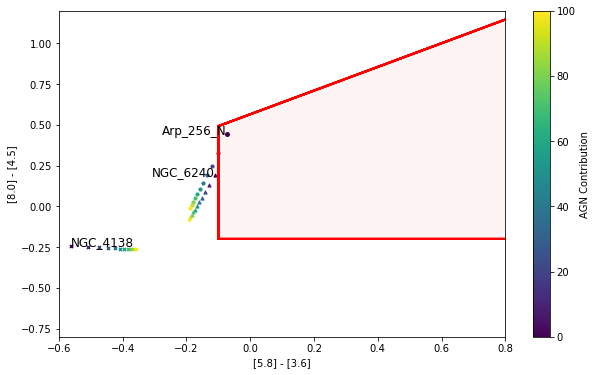

In [526]:
# Choose the diagram min and max
xmax = 0.8
ymax = 1.2
xmin = -0.6
ymin = -0.8

# Only include rest frame
composite_fluxes = composite_fluxes[composite_fluxes['z'] == 0]

# Subset the composite to only include the galaxies by id, and their associated colours
composite_subset_sf = composite_fluxes[(composite_fluxes['id'] == sf_galaxy_id)].copy()

# Subset the composite to only include the galaxies by id, and their associated colours
composite_subset_q = composite_fluxes[(composite_fluxes['id'] == quiescent_galaxy_id)].copy()

# Subset the composite to only include the galaxies by id, and their associated colours
composite_subset_d = composite_fluxes[(composite_fluxes['id'] == dusty_galaxy_id)].copy()


# make one subset
composite_subset = pd.concat([composite_subset_sf, composite_subset_q, composite_subset_d])

# reset index
composite_subset.reset_index(drop=True, inplace=True)


# Should be only three galaxies to plot now


# setup 
fig, axs = plt.subplots(1, 1, figsize=fig_size_params, sharex=True, sharey=True)
# turn alpha values back
alpha_values = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for n in range(len(alpha_values)):
    
    # Get the IRAC magnitudes
    f_36 = composite_subset[f'IRAC3.6_{alpha_values[n]}']
    f_45 = composite_subset[f'IRAC4.5_{alpha_values[n]}']
    f_58 = composite_subset[f'IRAC5.8_{alpha_values[n]}']
    f_80 = composite_subset[f'IRAC8.0_{alpha_values[n]}']
    
    # Create the colours for the IRAC diagram
    f_5836_specific_alpha_colours = np.log10(f_58/f_36)
    f_8045_specific_alpha_colours = np.log10(f_80/f_45)

    # Redefine x and y for the first alpha value to plot the wedge
    x = f_5836_specific_alpha_colours
    y = f_8045_specific_alpha_colours
    
    # Can change this to ensure we are only looking at the rest frame stuff
    x = x[(composite_subset['z'] >= 0) & (composite_subset['z'] <= 3.9)]
    y = y[(composite_subset['z'] >= 0) & (composite_subset['z'] <= 3.9)]
    
    
    
    # Reimplement the selection criteria 
    lacy_selection_condition = (x > -0.1) & (y > -0.2) & (y < 0.8 * x + 0.5)
    
    symbols = ['o', 'x', '^']
    
    for i in range(3):
        # Plot the scatter plot for each galaxy region - both in an out of the lacy wedge
        axs.scatter(x[(composite_subset['id'] == composite_subset['id'].iloc[i]) & lacy_selection_condition],
                    y[(composite_subset['id'] == composite_subset['id'].iloc[i]) & lacy_selection_condition],
                    c=[colours_theme[n]], s=15, marker=symbols[i])
        
        axs.scatter(x[(composite_subset['id'] == composite_subset['id'].iloc[i]) & ~lacy_selection_condition],
                    y[(composite_subset['id'] == composite_subset['id'].iloc[i]) & ~lacy_selection_condition],
                    c=[colours_theme[n]], s=10, marker=symbols[i])
        
    # Set the AGN Contribution title
    # Label the sf, quiescent, and dusty galaxies
    
    if n == 0:
        print(x)
        axs.text(x[0], y[0], f"{composite_subset['id'].iloc[0]}", fontsize=12, ha='right')
        axs.text(x[1], y[1], f"{composite_subset['id'].iloc[1]}", fontsize=12, ha='left')
        axs.text(x[2], y[2], f"{composite_subset['id'].iloc[2]}", fontsize=12, ha='right')
    
    
    # Colour code for each alpha
    # axs.scatter(x[lacy_selection_condition], y[lacy_selection_condition], c=[colours_theme[n]], s=10)
    # axs.scatter(x[~lacy_selection_condition], y[~lacy_selection_condition], c=[colours_theme[n]], s=10)
    
    
    # Get the IRAC magnitudes
    f_36 = composite_subset[f'IRAC3.6_{alpha_values[0]}']
    f_45 = composite_subset[f'IRAC4.5_{alpha_values[0]}']
    f_58 = composite_subset[f'IRAC5.8_{alpha_values[0]}']
    f_80 = composite_subset[f'IRAC8.0_{alpha_values[0]}']
    
    # Create the colours for the IRAC diagram
    f_5836_specific_alpha_colours = np.log10(f_58/f_36)
    f_8045_specific_alpha_colours = np.log10(f_80/f_45)
    
    
    # Redefine x and y for the first alpha value to plot the wedge
    x = f_5836_specific_alpha_colours
    y = f_8045_specific_alpha_colours
    
    # # Ensure we are only looking at the rest frame stuff
    # x = x[composite_fluxes['z'] == 0]
    # y = y[composite_fluxes['z'] == 0]
      # Can change this to ensure we are only looking at the rest frame stuff
    x = x[(composite_subset['z'] >= 0) & (composite_subset['z'] <= 3.9)]
    y = y[(composite_subset['z'] >= 0) & (composite_subset['z'] <= 3.9)]
    
    # # Reimplement the selection criteria
    lacy_selection_condition = (x > -0.1) & (y > -0.2) & (y < 0.8 * x + 0.5)
    wedge_vertices = [
        (xmax, -0.2),
        (-0.1, -0.2),
        (-0.1, 0.8*-0.01 + 0.5),  # Handle empty selection
        (((ymax-0.5)/0.8), ymax)
    ] 
    wedge_polygon = plt.Polygon(wedge_vertices, closed=False, edgecolor='r', facecolor=(1,0,0,0.005), linestyle='-', linewidth=2, label='Lacy Wedge')
    # Plot the polygon on the subplot
    axs.add_patch(wedge_polygon)
    
    
    # Set the AGN Contribution title
    # axs.set_title(rf'$\alpha$ = {alpha_values[n]}%')
    
    # Set the axis labels
    axs.set_xlabel("[5.8] - [3.6]")
    axs.set_ylabel("[8.0] - [4.5]")
    
    # Set the axis limits
    axs.set_xlim(xmin, xmax)
    axs.set_ylim(ymin, ymax)
    
# Add a colorbar for the AGN contribution
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(alpha_values), vmax=max(alpha_values)))
cbar = plt.colorbar(sm, ax=axs)

# Add the colorbar label
cbar.set_label('AGN Contribution')
 
    
        
# Make the subplots closer together
plt.subplots_adjust(wspace=0.05, hspace=0.3)
    
# # Save the output
if save_figures:
    plt.savefig(f'outputs/ThesisPlots/SED_evolution_IRAC_{template_set_name}_{agn_model_name}.png', dpi=300)
    
      
# Show the output
plt.show()